<a href="https://colab.research.google.com/github/hemu2014/python-ML/blob/main/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0-%E5%8D%B7%E7%A7%AF%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Computer Vision

In this guide we will learn how to peform *image classification and object detection/recognition* using deep computer vision with something called a **convolutional neural network**.

The goal of our convolutional neural networks will be to classify and detect images or specific objects from within the image. We will be using image data as our features and a label for those images as our label or output.

We already know how neural networks work so we can skip through the basics and move right into explaining the following concepts.
- Image Data
- Convolutional Layer
- Pooling Layer
- CNN Architectures

The major differences we are about to see in these types of neural networks are the layers that make them up.

##Image Data
So far, we have dealt with pretty straight forward data that has 1 or 2 dimensions. Now we are about to deal with image data that is usually made up of 3 dimensions. These 3 dimensions are as follows:
- image height
- image width
- color channels

The only item in the list above you may not understand is **color channels**. The number of color channels represents the depth of an image and coorelates to the colors used in it. For example, an image with three channels is likely made up of rgb (red, green, blue) pixels. So, for each pixel we have three numeric values in the range 0-255 that define its color. For an image of color depth 1 we would likely have a greyscale image with one value defining each pixel, again in the range of 0-255.

![alt text](http://xrds.acm.org/blog/wp-content/uploads/2016/06/Figure1.png)

Keep this in mind as we discuss how our network works and the input/output of each layer.



##Convolutional Neural Network
**Note:** I will use the term *convnet* and convolutional neural network interchangably.

Each convolutional neural network is made up of one or many convolutional layers. These layers are different than the *dense* layers we have seen previously. Their goal is to find patterns from within images that can be used to classify the image or parts of it. But this may sound familiar to what our densly connected neural network in the previous section was doing, well that's becasue it is.

The fundemental difference between a dense layer and a convolutional layer is that dense layers detect patterns globally while convolutional layers detect patterns locally. When we have a densly connected layer each node in that layer sees all the data from the previous layer. This means that this layer is looking at all the information and is only capable of analyzing the data in a global capacity. Our convolutional layer however will not be densly connected, this means it can detect local patterns using part of the input data to that layer.

*Let's have a look at how a densly connected layer would look at an image vs how a convolutional layer would.*

This is our image; the goal of our network will be to determine whether this image is a cat or not.
![alt text](https://img.webmd.com/dtmcms/live/webmd/consumer_assets/site_images/article_thumbnails/reference_guide/cat_weight_ref_guide/1800x1200_cat_weight_ref_guide.jpg)

**Dense Layer:** A dense layer will consider the ENTIRE image. It will look at all the pixels and use that information to generate some output.

**Convolutional Layer:** The convolutional layer will look at specific parts of the image. In this example let's say it analyzes the highlighted parts below and detects patterns there.
![alt text](https://drive.google.com/uc?export=view&id=1M7v7S-b-zisFLI_G4ZY_RdUJQrGpJ3zt)

Can you see why this might make these networks more useful?




###How They Work
A dense neural network learns patterns that are present in one specific area of an image. This means if a pattern that the network knows is present in a different area of the image it will have to learn the pattern again in that new area to be able to detect it.

*Let's use an example to better illustrate this.*

We'll consider that we have a dense neural network that has learned what an eye looks like from a sample of dog images.

![alt text](https://drive.google.com/uc?export=view&id=16FJKkVS_lZToQOCOOy6ohUpspWgtoQ-c)

Let's say it's determined that an image is likely to be a dog if an eye is present in the boxed off locations of the image above.

Now let's flip the image.
![alt text](https://drive.google.com/uc?export=view&id=1V7Dh7BiaOvMq5Pm_jzpQfJTZcpPNmN0W)

Since our densly connected network has only recognized patterns globally it will look where it thinks the eyes should be present. Clearly it does not find them there and therefore would likely determine this image is not a dog. Even though the pattern of the eyes is present, it's just in a different location.

Since convolutional layers learn and detect patterns from different areas of the image, they don't have problems with the example we just illustrated. They know what an eye looks like and by analyzing different parts of the image can find where it is present.



###Multiple Convolutional Layers
In our models it is quite common to have more than one convolutional layer. Even the basic example we will use in this guide will be made up of 3 convolutional layers. These layers work together by increasing complexity and abstraction at each subsequent layer. The first layer might be responsible for picking up edges and short lines, while the second layer will take as input these lines and start forming shapes or polygons. Finally, the last layer might take these shapes and determine which combiantions make up a specific image.





##Feature Maps
You may see me use the term *feature map* throughout this tutorial. This term simply stands for a 3D tensor with two spacial axes (width and height) and one depth axis. Our convolutional layers take feature maps as their input and return a new feature map that reprsents the prescence of spcific filters from the previous feature map. These are what we call *response maps*.

##Layer Parameters
A convolutional layer is defined by two key parameters.

####**Filters**
A filter is a m x n pattern of pixels that we are looking for in an image. The number of filters in a convolutional layer reprsents how many patterns each layer is looking for and what the depth of our response map will be. If we are looking for 32 different patterns/filters than our output feature map (aka the response map) will have a depth of 32. Each one of the 32 layers of depth will be a matrix of some size containing values indicating if the filter was present at that location or not.

Here's a great illustration from the book "Deep Learning with Python" by Francois Chollet (pg 124).
![alt text](https://drive.google.com/uc?export=view&id=1HcLvvLKvLCCGuGZPMvKYz437FbbCC2eB)

####**Sample Size**
This isn't really the best term to describe this, but each convolutional layer is going to examine n x m blocks of pixels in each image. Typically, we'll consider 3x3 or 5x5 blocks. In the example above we use a 3x3 "sample size". This size will be the same as the size of our filter.

Our layers work by sliding these filters of n x m pixels over every possible position in our image and populating a new feature map/response map indicating whether the filter is present at each location.




##Borders and Padding
The more mathematical of you may have realized that if we slide a filter of let's say size 3x3 over our image well consider less positions for our filter than pixels in our input. Look at the example below.

*Image from "Deep Learning with Python" by Francois Chollet (pg 126).*
![alt text](https://drive.google.com/uc?export=view&id=1OEfXrV16NBjwAafgBfYYcWOyBCHqaZ5M)

This means our response map will have a slightly smaller width and height than our original image. This is fine but sometimes we want our response map to have the same dimensions. We can accomplish this by using something called *padding*.

**Padding** is simply the addition of the appropriate number of rows and/or columns to your input data such that each pixel can be centered by the filter.

##Strides
In the previous sections we assumed that the filters would be slid continously through the image such that it covered every possible position. This is common but sometimes we introduce the idea of a **stride** to our convolutional layer. The stride size reprsents how many rows/cols we will move the filter each time. These are not used very frequently so we'll move on.

##Pooling
You may recall that our convnets are made up of a stack of convolution and pooling layers.

The idea behind a pooling layer is to downsample our feature maps and reduce their dimensions. They work in a similar way to convolutional layers where they extract windows from the feature map and return a response map of the max, min or average values of each channel. Pooling is usually done using windows of size 2x2 and a stride of 2. This will reduce the size of the feature map by a factor of two and return a response map that is 2x smaller.

##A More Detailed Look
Please refer to the video to learn how all of this happens at the lower level!

##Creating a Convnet

Now it is time to create our first convnet! This example is for the purpose of getting familiar with CNN architectures, we will talk about how to improves its performance later.

*This tutorial is based on the following guide from the TensorFlow documentation: https://www.tensorflow.org/tutorials/images/cnn*

###Dataset
The problem we will consider here is classifying 10 different everyday objects. The dataset we will use is built into tensorflow and called the [**CIFAR Image Dataset.**](https://www.cs.toronto.edu/~kriz/cifar.html) It contains 60,000 32x32 color images with 6000 images of each class.

The labels in this dataset are the following:
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

We'll load the dataset and have a look at some of the images below.




In [49]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [18]:
print([class_names[i] for i in [1,3,5]])

['automobile', 'cat', 'dog']


In [27]:
train_labels[0:6][2][0]

np.uint8(9)

In [28]:
[6][0]

6

In [34]:
a = train_labels[0:6].reshape(-1, )
print(type(a), a)

<class 'numpy.ndarray'> [6 9 9 4 1 1]


In [35]:
b = list(train_labels[0:6].reshape(-1, ))
print(type(b), b)

<class 'list'> [np.uint8(6), np.uint8(9), np.uint8(9), np.uint8(4), np.uint8(1), np.uint8(1)]


In [36]:
c = train_labels[0:6].flatten()
print(type(c), c)

<class 'numpy.ndarray'> [6 9 9 4 1 1]


In [43]:
print(train_labels[0:6].reshape(-1).shape)
print(train_labels[0:6].flatten().shape)
print(train_labels[0:6].reshape(-1,).shape)

(6,)
(6,)
(6,)


In [50]:
print(type(train_labels))
print(train_labels.shape)
print(train_labels[0:6])  # 前6张照片的类别
print([class_names[i] for i in train_labels[0:6].reshape(-1, )])
print([class_names[i[0]] for i in train_labels[0:6]])
print([class_names[i] for i in train_labels[0:6].flatten()])
print(np.array(class_names)[train_labels[0:6].flatten()])
# print([class_names[i] for i in list(train_labels[0:6].reshape(1, -1))]) 还是一个二维数组
#print(train_labels)

<class 'numpy.ndarray'>
(50000, 1)
[[6]
 [9]
 [9]
 [4]
 [1]
 [1]]
['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile']
['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile']
['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile']
['frog' 'truck' 'truck' 'deer' 'automobile' 'automobile']


In [9]:
print(type(train_images))
print(train_images.shape)
print(train_images[0][0][0]) # 第一张照片的第一个像素的RGB值， 值除于了255
print(train_images[0][0])  # 第一张照片的第一行像素的所有RGB值

<class 'numpy.ndarray'>
(50000, 32, 32, 3)
[0.23137255 0.24313725 0.24705882]
[[0.23137255 0.24313725 0.24705882]
 [0.16862745 0.18039216 0.17647059]
 [0.19607843 0.18823529 0.16862745]
 [0.26666667 0.21176471 0.16470588]
 [0.38431373 0.28627451 0.20392157]
 [0.46666667 0.35686275 0.24705882]
 [0.54509804 0.41960784 0.29411765]
 [0.56862745 0.43137255 0.31372549]
 [0.58431373 0.45882353 0.34901961]
 [0.58431373 0.47058824 0.36470588]
 [0.51372549 0.40392157 0.30196078]
 [0.49019608 0.38823529 0.29803922]
 [0.55686275 0.45098039 0.35686275]
 [0.56470588 0.43921569 0.3372549 ]
 [0.5372549  0.41176471 0.30980392]
 [0.50588235 0.38039216 0.27843137]
 [0.5372549  0.41568627 0.30980392]
 [0.5254902  0.41568627 0.29803922]
 [0.48627451 0.38039216 0.25098039]
 [0.54509804 0.44313725 0.30588235]
 [0.54509804 0.43921569 0.29411765]
 [0.52156863 0.41176471 0.27058824]
 [0.53333333 0.41176471 0.29019608]
 [0.54509804 0.42352941 0.30196078]
 [0.59607843 0.47058824 0.34901961]
 [0.63921569 0.5137254

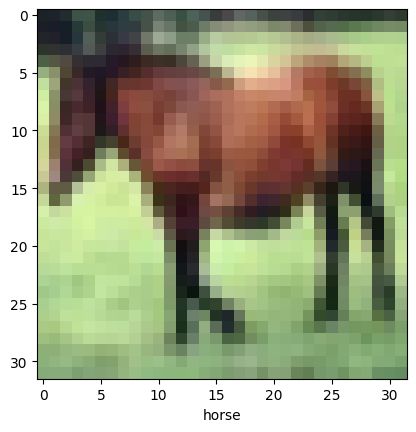

In [61]:
# Let's look at a one image
IMG_INDEX = 7  # change this to look at other images

plt.imshow(train_images[IMG_INDEX],cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])  # shape为（50000，1）的结构所以就是取第几张照片的第0列，也就是类别数字
plt.show()

##CNN Architecture
A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few denesly connected layers. To idea is that the stack of convolutional and maxPooling layers extract the features from the image. Then these features are flattened and fed to densly connected layers that determine the class of an image based on the presence of features.

We will start by building the **Convolutional Base**.

In [62]:
model = models.Sequential() # 创建对象
# 32：过滤器数量，（3,3）：过滤器大小 ， 激活函数：relu， 输入的形状：图像数据 （32,32,3）： 像素与颜色通道
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(32, 32, 3))) # 添加卷积层
model.add(layers.MaxPooling2D((2,2))) # 添加池化层
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

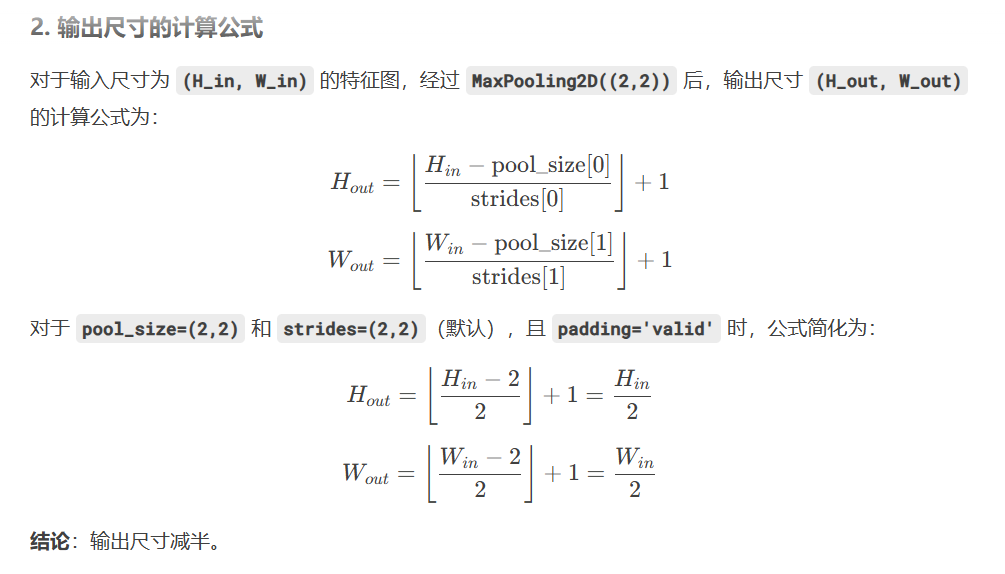

**Layer 1**

The input shape of our data will be 32, 32, 3 and we will process 32 filters of size 3x3 over our input data. We will also apply the activation function relu to the output of each convolution operation.

**Layer 2**

This layer will perform the max pooling operation using 2x2 samples and a stride of 2.

**Other Layers**

The next set of layers do very similar things but take as input the feature map from the previous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spacial dimensions as it passed through the layers, meaning we can afford (computationally) to add more depth.

● 卷积层（Conv2D）：
参数数量取决于卷积核大小、输入/输出通道数。例如：
Conv2D(32, (3,3), input_shape=(28,28,1)) 的参数为 (3×3×1)×32 + 32 = 320。

● 池化层（MaxPooling2D）：
和 Flatten 类似，无参数（仅是固定计算）。

● 循环层（LSTM）：
参数数量与输入维度、隐藏单元数相关，计算较复杂。
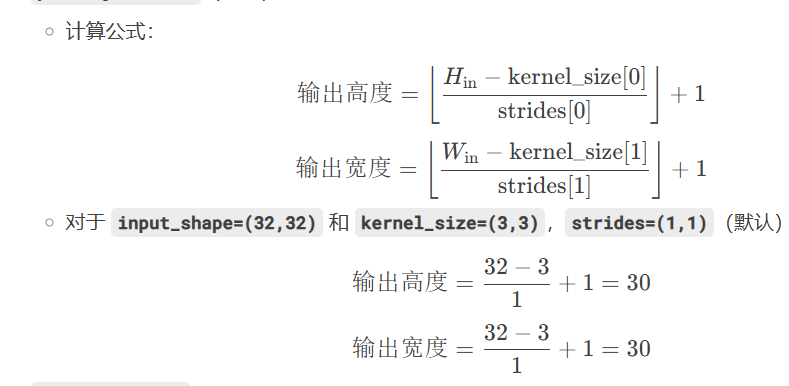

In [63]:
model.summary()  # let's have a look at our model so far
# 为什么减2， 输入为32*32， 过滤器为3*3， 29+3=32， 输出就是 29+1=30
# 所以输入的层数会减2
# n * n -> n=m+3 -> M+1--》 输出层为（m+1, m+1）

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

After looking at the summary you should notice that the depth of our image increases but the spacial dimensions reduce drastically.
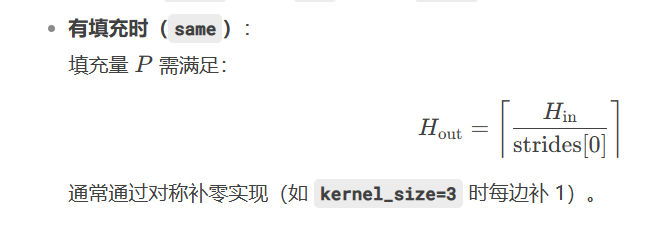

##Adding Dense Layers
So far, we have just completed the **convolutional base**. Now we need to take these extracted features and add a way to classify them. This is why we add the following layers to our model.



In [64]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [65]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

We can see that the flatten layer changes the shape of our data so that we can feed it to the 64-node dense layer, follwed by the final output layer of 10 neurons (one for each class).



##Training
Now we will train and compile the model using the recommended hyper paramaters from tensorflow.

*Note: This will take much longer than previous models!*

###(3) validation_data=(test_images, test_labels)

作用：在每个epoch结束后用测试集评估模型性能。

输出信息：

* 训练损失（loss）和准确率（accuracy）。

* 验证损失（val_loss）和验证准确率（val_accuracy）。

####为什么需要验证集：

监控模型是否过拟合（如果 val_loss 上升而 train_loss 下降，说明过拟合）。

* loss：训练集损失值（越小越好）。

* val_accuracy：测试集准确率（关键监控指标）。

In [66]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=4,
                    validation_data=(test_images, test_labels))

Epoch 1/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 40ms/step - accuracy: 0.3389 - loss: 1.7742 - val_accuracy: 0.5437 - val_loss: 1.2728
Epoch 2/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.5546 - loss: 1.2445 - val_accuracy: 0.5932 - val_loss: 1.1265
Epoch 3/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 37ms/step - accuracy: 0.6149 - loss: 1.0843 - val_accuracy: 0.6292 - val_loss: 1.0561
Epoch 4/4
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.6554 - loss: 0.9729 - val_accuracy: 0.6580 - val_loss: 0.9826


##Evaluating the Model
We can determine how well the model performed by looking at it's performance on the test data set.

In [67]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 3s - 9ms/step - accuracy: 0.6580 - loss: 0.9826
0.6579999923706055


In [68]:
print(history.history.keys())  # 输出：['loss', 'accuracy', 'val_loss', 'val_accuracy']

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [69]:
print(history.history)

{'accuracy': [0.4348199963569641, 0.5723999738693237, 0.6260600090026855, 0.6609200239181519], 'loss': [1.5428931713104248, 1.2017120122909546, 1.0596917867660522, 0.961580753326416], 'val_accuracy': [0.5436999797821045, 0.5932000279426575, 0.6291999816894531, 0.6579999923706055], 'val_loss': [1.2727546691894531, 1.1264501810073853, 1.0560981035232544, 0.98264080286026]}



* history.history 属性是一个字典，其中包含训练期间记录的指标。
matplotlib.pyplot 模块提供用于绘制图表的函数。
plot() 函数用于绘制曲线。
legend() 函数用于显示图例。
show() 函数用于显示图表。

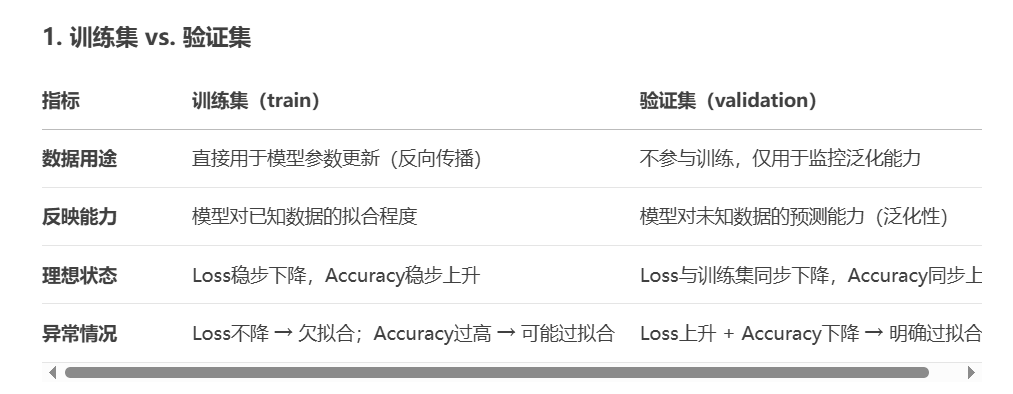

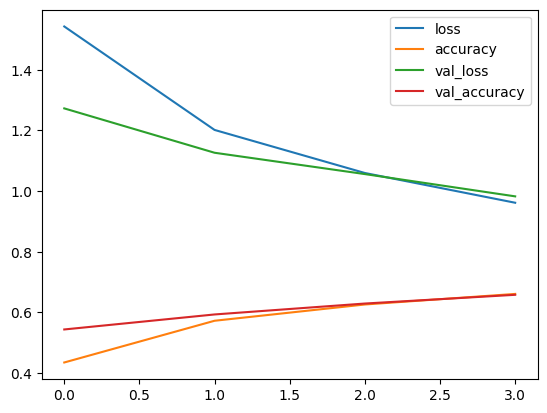

In [72]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

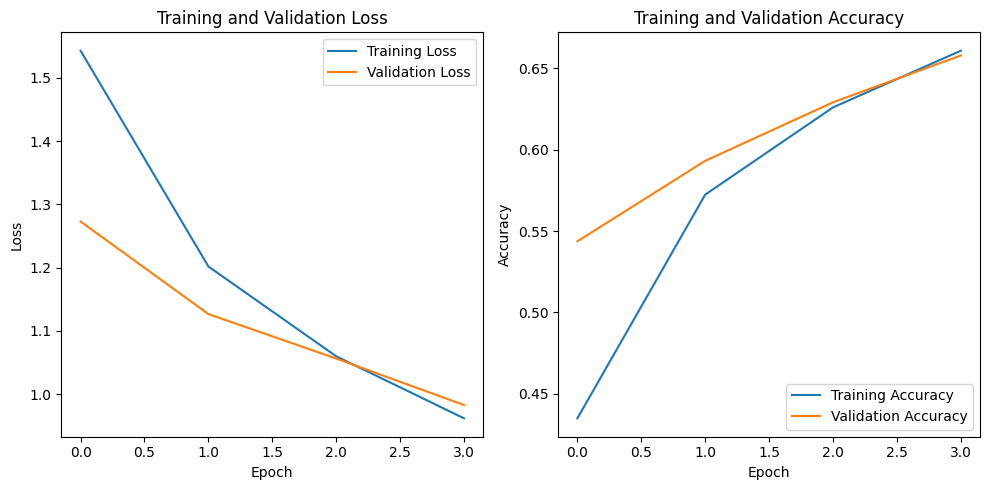

In [74]:
# 绘制训练曲线
plt.figure(figsize=(10, 5))  # 设置图像大小

# 绘制 loss 曲线
plt.subplot(1, 2, 1)  # 创建子图
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# 绘制 accuracy 曲线
plt.subplot(1, 2, 2)  # 创建子图
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()  # 调整子图布局
plt.show()  # 显示图像

You should be getting an accuracy of about 70%. This isn't bad for a simple model like this, but we'll dive into some better approaches for computer vision below.



##Working with Small Datasets
In the situation where you don't have millions of images it is difficult to train a CNN from scratch that performs very well. This is why we will learn about a few techniques we can use to train CNN's on small datasets of just a few thousand images.

###Data Augmentation
To avoid overfitting and create a larger dataset from a smaller one we can use a technique called data augmentation. This is simply performing random transofrmations on our images so that our model can generalize better. These transformations can be things like compressions, rotations, stretches and even color changes.

Fortunately, keras can help us do this. Look at the code below to an example of data augmentation.



In [77]:
(1,2) + (1,4)

(1, 2, 1, 4)

In [78]:
[1,3] + [3,5]

[1, 3, 3, 5]

[[[0.6        0.61568627 0.60784314]
  [0.68235294 0.70588235 0.7372549 ]
  [0.60784314 0.64705882 0.6745098 ]
  ...
  [0.47843137 0.49019608 0.48235294]
  [0.54117647 0.56078431 0.55294118]
  [0.38039216 0.39607843 0.38039216]]

 [[0.62745098 0.63921569 0.64705882]
  [0.64313725 0.66666667 0.70588235]
  [0.58823529 0.62352941 0.6627451 ]
  ...
  [0.5372549  0.52941176 0.50588235]
  [0.62745098 0.63137255 0.61568627]
  [0.40392157 0.42745098 0.41960784]]

 [[0.54901961 0.56078431 0.57647059]
  [0.57647059 0.59607843 0.65098039]
  [0.53333333 0.56862745 0.61960784]
  ...
  [0.40784314 0.40392157 0.38823529]
  [0.49019608 0.50196078 0.49019608]
  [0.36470588 0.4        0.39607843]]

 ...

 [[0.68627451 0.69411765 0.70196078]
  [0.66666667 0.6745098  0.68235294]
  [0.66666667 0.6745098  0.68235294]
  ...
  [0.75686275 0.79607843 0.83137255]
  [0.77254902 0.80784314 0.83921569]
  [0.78039216 0.8        0.83529412]]

 [[0.68235294 0.69411765 0.70980392]
  [0.67843137 0.69019608 0.70588235]


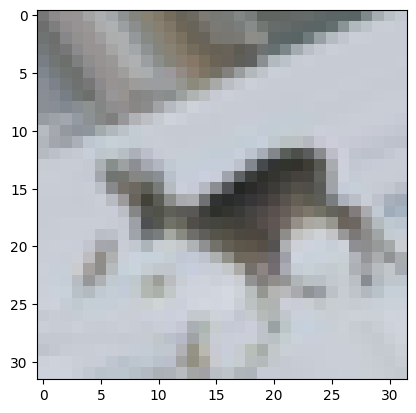

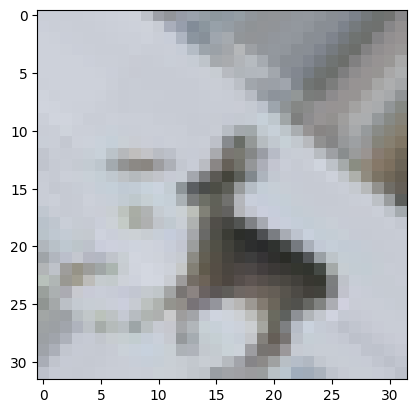

In [83]:
from keras.preprocessing import image

# from keras.preprocessing.image import ImageDataGenerator 已经整合到tensorflow.keras.preprocessing.image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ... (rest of your code) ...

#创建一个数据生成器对象，该对象转换图像
# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = train_images[20]
print(test_img)
print(f"test_img:{test_img.shape}, {type(test_img)}")
img = image.img_to_array(test_img)  # convert image to numpy arry
print(img)
print(f"img:{img.shape}, {type(img)}")
img = img.reshape((1,) + img.shape)  # reshape image 增加维度，将图像形状从(height, width, channels)改为(1, height, width, channels)，因为生成器期望批量的图像
'''
img = img[np.newaxis, ...]  # 使用np.newaxis添加新维度
# 或
img = np.expand_dims(img, axis=0)  # 使用expand_dims明确扩展维度
'''
print(img.shape, type(img), img)

i = 0
#这个循环会无限运行，直到我们中断，将带有指定前缀的图像保存到当前目录
for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    '''
    print(datagen.flow(img, save_prefix='test', save_format='jpeg')[0].shape)
    print(datagen.flow(img, save_prefix='test', save_format='jpeg')[0][0].shape)
    # 输出：
    (1, 32, 32, 3) --》batch
    (32, 32, 3)--》batch[0]
    '''

    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0])) # batch[0]就是照片的数据
    i += 1
    if i > 1:  # show 4 images
        break

plt.show()





NumpyArrayIterator 实现了 __len__() 方法，返回的是总批次数（steps_per_epoch）。

* 你传入的 img 的形状是 (1, height, width, channels)（即批量大小为 1 的单个图像）。

* 默认情况下，batch_size=32，但你的输入数据只有 1 张图像，因此：

* 计算批次数：ceil(1 / 32) = 1。

所以 len(number) 返回 1，表示这个迭代器会生成 1 个批次的数据。




In [92]:
number = datagen.flow(img, save_prefix='test', save_format='jpeg')

print(type(number))
print(len(number))

<class 'keras.src.legacy.preprocessing.image.NumpyArrayIterator'>
1


####如果你传入更多图像（例如 100 张），len() 会返回相应的批次数：
NumpyArrayIterator 的关键特性
* 它是一个无限循环的迭代器（除非手动 break），每次调用 next(number) 或遍历时都会生成新批次。

* 如果输入数据用完，它会自动从头开始（适合训练时无限循环数据）。

* 它的 __len__() 返回的是每个 epoch 的批次数，而不是总图像数。

In [93]:
img_batch = np.random.rand(100, 256, 256, 3)  # 模拟 100 张图像
number = datagen.flow(img_batch)
print(len(number))  # 输出 ceil(100 / 32) = 4（因为 32*3=96，剩余 4 张单独一批）

4


In [90]:
print(datagen.flow(img, save_prefix='test', save_format='jpeg')[0].shape)
print(datagen.flow(img, save_prefix='test', save_format='jpeg')[0][0].shape) #

(1, 32, 32, 3)
(32, 32, 3)


###Pretrained Models
You would have noticed that the model above takes a few minutes to train in the NoteBook and only gives an accuaracy of ~70%. This is okay but surely there is a way to improve on this.

In this section we will talk about using a pretrained CNN as apart of our own custom network to improve the accuracy of our model. We know that CNN's alone (with no dense layers) don't do anything other than map the presence of features from our input. This means we can use a pretrained CNN, one trained on millions of images, as the start of our model. This will allow us to have a very good convolutional base before adding our own dense layered classifier at the end. In fact, by using this techique we can train a very good classifier for a realtively small dataset (< 10,000 images). This is because the convnet already has a very good idea of what features to look for in an image and can find them very effectively. So, if we can determine the presence of features all the rest of the model needs to do is determine which combination of features makes a specific image.



###Fine Tuning
When we employ the technique defined above, we will often want to tweak the final layers in our convolutional base to work better for our specific problem. This involves not touching or retraining the earlier layers in our convolutional base but only adjusting the final few. We do this because the first layers in our base are very good at extracting low level features lile lines and edges, things that are similar for any kind of image. Where the later layers are better at picking up very specific features like shapes or even eyes. If we adjust the final layers than we can look for only features relevant to our very specific problem.



这涉及到不触碰或重新训练卷积基中的早期层，而只调整最后几层。
* 我们这样做是因为我们基的**第一层非常擅长提取低级特征，如线条和边缘**，这些对于任何类型的图像都是相似的。
* 而后期层则更擅长**捕捉非常具体的特征**，如形状甚至眼睛。
* 如果我们调整最终层，那么我们就可以**只寻找与我们非常具体的特定问题相关的特征**。

##Using a Pretrained Model
In this section we will combine the tecniques we learned above and use a pretrained model and fine tuning to classify images of dogs and cats using a small dataset.

*This tutorial is based on the following guide from the TensorFlow documentation: https://www.tensorflow.org/tutorials/images/transfer_learning*




In [94]:
#Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

###Dataset
We will load the *cats_vs_dogs* dataset from the modoule tensorflow_datatsets.

This dataset contains (image, label) pairs where images have different dimensions and 3 color channels.



split=['train[:80%]', 'train[80%:90%]', 'train[90%:]']

手动将原始训练集 train 分割为三部分：

* train[:80%]：前 80% 的数据作为训练集（raw_train）。

* train[80%:90%]：接下来 10% 的数据作为验证集（raw_validation）。

* train[90%:]：最后 10% 的数据作为测试集（raw_test）。

####数据格式：
由于设置了 as_supervised=True，**每条数据是一个 (image, label) 元组：**

* image：一张彩色图片（形状为 (height, width, 3) 的 Tensor，像素值范围 [0, 255]）。

* label：整数标签（0=猫，1=狗）。

In [95]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# split the data manually into 80% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True, # 返回数据集的元信息（metadata），包括类别标签、数据集描述等。
    as_supervised=True,# 将数据加载为 (input, label) 的监督学习格式（即每张图片对应一个标签）
)

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [96]:
metadata.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'image/filename': Text(shape=(), dtype=string),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
})

In [97]:
print(metadata.features['label'].names)  # 输出: ['cat', 'dog']

['cat', 'dog']


In [102]:
print(metadata.features['label'].int2str(0))

cat


In [104]:
raw_train.take(5)

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

###访问raw_train.take()内容
####方法一：使用迭代器

In [106]:
for element in raw_train.take(1):
    print(element)  # 打印每个元素内容

(<tf.Tensor: shape=(262, 350, 3), dtype=uint8, numpy=
array([[[251, 255, 255],
        [248, 254, 252],
        [242, 246, 245],
        ...,
        [188, 176, 128],
        [142, 132,  81],
        [160, 150,  99]],

       [[247, 253, 251],
        [246, 252, 250],
        [241, 245, 244],
        ...,
        [188, 178, 129],
        [164, 154, 103],
        [176, 166, 115]],

       [[244, 249, 245],
        [244, 249, 245],
        [236, 241, 237],
        ...,
        [197, 187, 138],
        [203, 193, 142],
        [198, 191, 139]],

       ...,

       [[127, 124,  73],
        [149, 146,  95],
        [155, 152, 101],
        ...,
        [165, 170, 140],
        [ 81,  88,  57],
        [ 75,  84,  53]],

       [[167, 164, 113],
        [104, 101,  50],
        [139, 136,  85],
        ...,
        [ 67,  73,  45],
        [ 48,  57,  28],
        [ 38,  49,  19]],

       [[135, 132,  81],
        [ 77,  74,  23],
        [135, 132,  81],
        ...,
        [ 61,  70,  

###方法二：转换成列表

In [108]:
elements = list(raw_train.take(5))
print(elements[0])  # 打印所有元素

(<tf.Tensor: shape=(262, 350, 3), dtype=uint8, numpy=
array([[[251, 255, 255],
        [248, 254, 252],
        [242, 246, 245],
        ...,
        [188, 176, 128],
        [142, 132,  81],
        [160, 150,  99]],

       [[247, 253, 251],
        [246, 252, 250],
        [241, 245, 244],
        ...,
        [188, 178, 129],
        [164, 154, 103],
        [176, 166, 115]],

       [[244, 249, 245],
        [244, 249, 245],
        [236, 241, 237],
        ...,
        [197, 187, 138],
        [203, 193, 142],
        [198, 191, 139]],

       ...,

       [[127, 124,  73],
        [149, 146,  95],
        [155, 152, 101],
        ...,
        [165, 170, 140],
        [ 81,  88,  57],
        [ 75,  84,  53]],

       [[167, 164, 113],
        [104, 101,  50],
        [139, 136,  85],
        ...,
        [ 67,  73,  45],
        [ 48,  57,  28],
        [ 38,  49,  19]],

       [[135, 132,  81],
        [ 77,  74,  23],
        [135, 132,  81],
        ...,
        [ 61,  70,  

###方法三：使用 as_numpy_iterator()

In [113]:
for element in raw_train.take(1).as_numpy_iterator():
    print(element)  # 打印每个元素内容

(array([[[251, 255, 255],
        [248, 254, 252],
        [242, 246, 245],
        ...,
        [188, 176, 128],
        [142, 132,  81],
        [160, 150,  99]],

       [[247, 253, 251],
        [246, 252, 250],
        [241, 245, 244],
        ...,
        [188, 178, 129],
        [164, 154, 103],
        [176, 166, 115]],

       [[244, 249, 245],
        [244, 249, 245],
        [236, 241, 237],
        ...,
        [197, 187, 138],
        [203, 193, 142],
        [198, 191, 139]],

       ...,

       [[127, 124,  73],
        [149, 146,  95],
        [155, 152, 101],
        ...,
        [165, 170, 140],
        [ 81,  88,  57],
        [ 75,  84,  53]],

       [[167, 164, 113],
        [104, 101,  50],
        [139, 136,  85],
        ...,
        [ 67,  73,  45],
        [ 48,  57,  28],
        [ 38,  49,  19]],

       [[135, 132,  81],
        [ 77,  74,  23],
        [135, 132,  81],
        ...,
        [ 61,  70,  41],
        [ 12,  21,   0],
        [ 64,  75,  45]

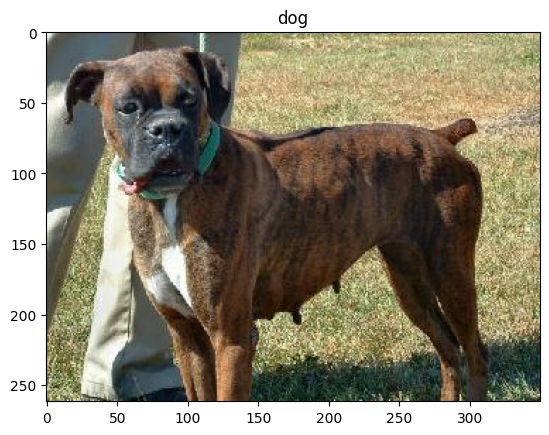

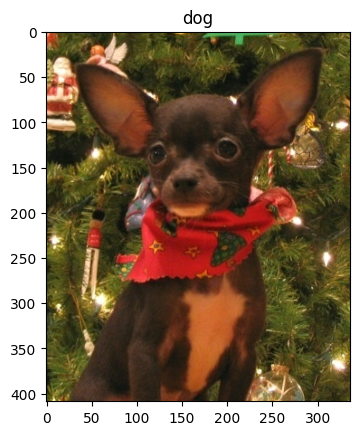

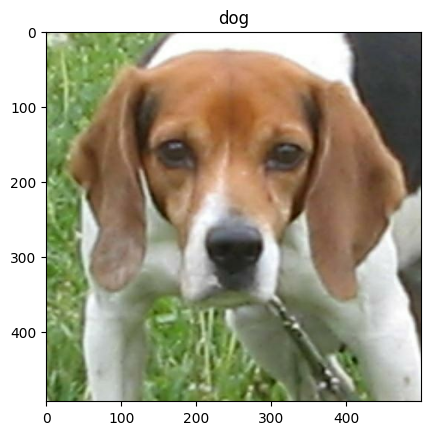

In [115]:
get_label_name = metadata.features['label'].int2str  # creates a function object that we can use to get labels
'''
# 获取标签名称列表（按数字标签顺序排列）
label_names = metadata.features['label'].names
print(label_names)  # 例如输出: ['cat', 'dog']
for image, label in raw_train.take(5):
    print("数字标签:", label.numpy(), "→ 字符串标签:", label_names[label.numpy()])

'''
# display 2 images from the dataset
for image, label in raw_train.take(3):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

###Data Preprocessing
Since the sizes of our images are all different, we need to convert them all to the same size. We can create a function that will do that for us below.



In [133]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
  """
  returns an image that is reshaped to IMG_SIZE
  """
  image = tf.cast(image, tf.float32) # 将图像的像素值从原始类型（如 uint8，范围 [0, 255]）转换为 float32 类型
  image = (image/127.5) - 1 #将像素值从 [0, 255] 线性归一化到 [-1, 1] 范围。
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) #使用双线性插值（默认方法）将图像调整为 (160, 160) 大小
  return image, label

Now we can apply this function to all our images using ```.map()```.

In [134]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

Let's have a look at our images now.

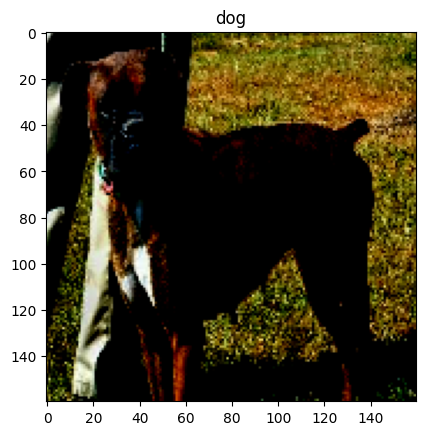

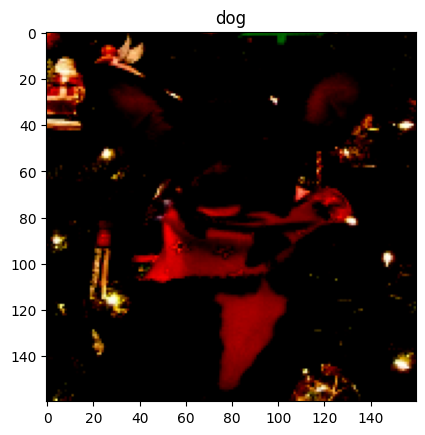

In [135]:
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

Finally we will shuffle and batch the images.

In [136]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [154]:
for images, labels in train_batches.take(1):
    print("图像批次形状:", images.shape)  # 输出: (32, 160, 160, 3)
    print("标签批次形状:", labels.shape)  # 输出: (32,)

图像批次形状: (32, 160, 160, 3)
标签批次形状: (32,)


Now if we look at the shape of an original image vs the new image we will see it has been changed.

Original shape: (262, 350, 3)
140604178279376
Original shape: (409, 336, 3)
140604178281680
New shape: (160, 160, 3)
140604178282064
New shape: (160, 160, 3)
140604178283024
New shape: (160, 160, 3)
140604178281872
New shape: (160, 160, 3)
140604178282448


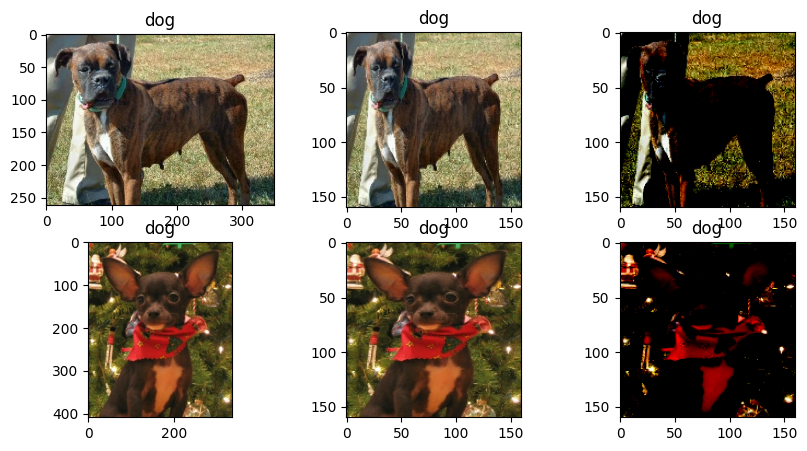

In [153]:
fig, axes = plt.subplots(2, 3, figsize=(10,5))

for i, (img, label) in enumerate(raw_train.take(2)):
  print("Original shape:", img.shape)
  print(id(img))
  axes[i][0].imshow(img)
  axes[i][0].set_title(get_label_name(label))
for i, (img, label) in enumerate(train.take(2)):
  print("New shape:", img.shape)
  print(id(img))
  # 显示前将图像从 [-1,1] 转回 [0,255]
  image_display = ((img + 1) * 127.5).numpy().astype(np.uint8)
  axes[i][1].imshow(image_display)
  axes[i][1].set_title(get_label_name(label))
for i, (img, label) in enumerate(train.take(2)):
  print("New shape:", img.shape)
  print(id(img))
  # 显示时未还原像素范围，导致图像模糊
  axes[i][2].imshow(img)
  axes[i][2].set_title(get_label_name(label))
plt.show()

###Picking a Pretrained Model
The model we are going to use as the convolutional base for our model is the **MobileNet V2** developed at Google. This model is trained on 1.4 million images and has 1000 different classes.

We want to use this model but only its convolutional base. So, when we load in the model, we'll specify that we don't want to load the top (classification) layer. We'll tell the model what input shape to expect and to use the predetermined weights from *imagenet* (Googles dataset).





```
# 通常情况下，在创建基础模型之后，我们会添加自己的分类层或其他自定义层，
以使模型能够执行我们需要的特定任务。例如，我们可以添加一个全连接层，
然后将其连接到基础模型的输出，以执行图像分类。
```



In [150]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                          include_top=False,
                          weights='imagenet')

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [151]:
base_model.summary()

Model: "mobilenetv2_1.00_160"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 80, 80,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 80, 80,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 80, 80,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 80, 80,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 80, 80,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 80, 80,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 81, 81,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 40, 40,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 40, 40,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

At this point this *base_model* will simply output a shape (32, 5, 5, 1280) tensor that is a feature extraction from our original (1, 160, 160, 3) image. The 32 means that we have 32 layers of differnt filters/features.

In [155]:
for image, _ in train_batches.take(1):
   pass

feature_batch = base_model(image)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [156]:
# 检查输出形状示例
sample_batch = next(iter(train_batches))
features = base_model(sample_batch[0])
print(features.shape)  # 输出: (32, 5, 5, 1280)（假设批次大小为32）

(32, 5, 5, 1280)


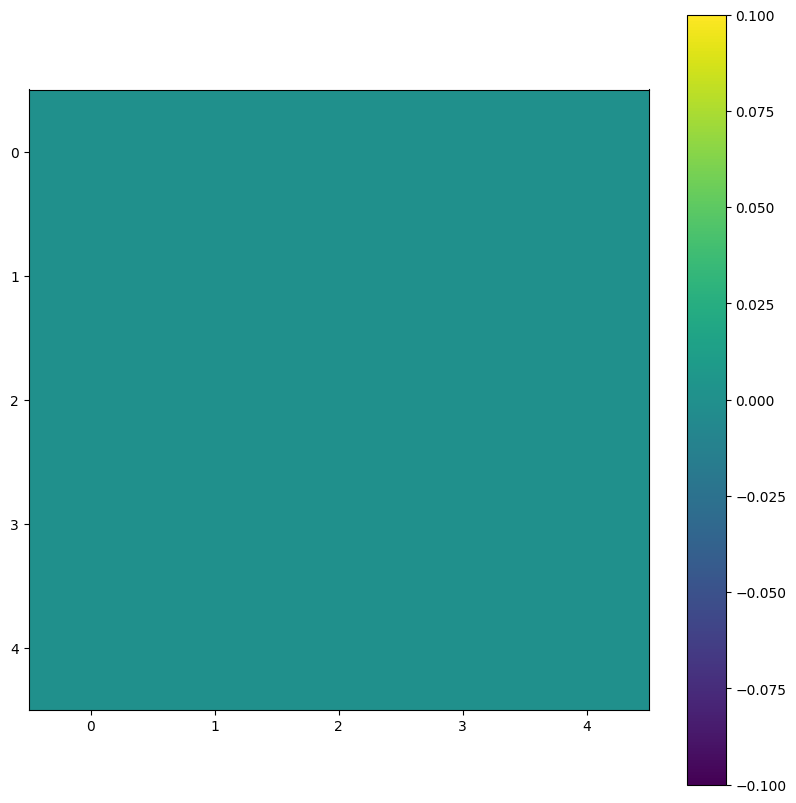

In [166]:
plt.figure(figsize=(10, 10))
plt.imshow(feature_batch[0, :, :, 0], cmap='viridis')  # 第一个样本的第0个通道
plt.colorbar()
plt.show()

###Freezing the Base
The term **freezing** refers to disabling the training property of a layer. It simply means we won’t make any changes to the weights of any layers that are frozen during training. This is important as we don't want to change the convolutional base that already has learned weights.



In [185]:
base_model.trainable = False #冻结卷积基：防止预训练权重在训练初期被破坏。

In [186]:
base_model.summary()

Model: "mobilenetv2_1.00_160"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 80, 80,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 80, 80,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 80, 80,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 80, 80,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 80, 80,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 80, 80,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 80, 80,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 80, 80,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 81, 81,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 40, 40,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 40, 40,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 40, 40,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

###Adding our Classifier
Now that we have our base layer setup, we can add the classifier. Instead of flattening the feature map of the base layer we will use a global average pooling layer that will average the entire 5x5 area of each 2D feature map and return to us a single 1280 element vector per filter.  



In [187]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

Finally, we will add the predicition layer that will be a single dense neuron. We can do this because we only have two classes to predict for.




In [188]:
prediction_layer = keras.layers.Dense(1)

Now we will combine these layers together in a model.

In [189]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [190]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

###Training the Model
Now we will train and compile the model. We will use a very small learning rate to ensure that the model does not have any major changes made to it.

In [191]:
base_learning_rate = 0.0001
'''
错误信息“ValueError: Argument(s) not recognized: {'lr': 0.0001}”
表明 TensorFlow Keras 中的 RMSprop 优化器不再接受 lr 参数来指定学习率。
相反，它期望使用 learning_rate 参数。这种变化可能发生在 TensorFlow 或 Keras 的最近更新中。

'''
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [192]:
# We can evaluate the model right now to see how it does before training it on our new images
initial_epochs = 3
validation_steps=20

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 596ms/step - accuracy: 0.4144 - loss: 0.8500


In [193]:
# Now we can train it on our images
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

acc = history.history['accuracy']
print(acc)

Epoch 1/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 367s 620ms/step - accuracy: 0.7946 - loss: 0.3825 - val_accuracy: 0.9682 - val_loss: 0.0900
Epoch 2/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 371s 601ms/step - accuracy: 0.9748 - loss: 0.0766 - val_accuracy: 0.9781 - val_loss: 0.0669
Epoch 3/3
582/582 ━━━━━━━━━━━━━━━━━━━━ 355s 608ms/step - accuracy: 0.9805 - loss: 0.0579 - val_accuracy: 0.9798 - val_loss: 0.0592
[0.8990865349769592, 0.9752821326255798, 0.9794734120368958]


In [168]:
loss, accuracy= model.evaluate(test_batches)
print(accuracy)

73/73 ━━━━━━━━━━━━━━━━━━━━ 43s 573ms/step - accuracy: 0.9814 - loss: 0.0520
0.9785038828849792


<_BatchDataset element_spec=(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
(32, 160, 160, 3)
Predictions:
 [0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0]
Labels:
 [0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0]
[[[ 0.0406128   0.09551476  0.03276967]
  [ 0.08289222  0.13752456  0.08397065]
  [ 0.11678927  0.16078436  0.16041672]
  ...
  [-0.27843136 -0.23137254 -0.26274508]
  [-0.28625765 -0.23919883 -0.27057138]
  [-0.29599413 -0.2489353  -0.28030786]]

 [[ 0.04640478  0.10130673  0.03856164]
  [ 0.09100496  0.1456373   0.09208339]
  [ 0.1246324   0.1686275   0.16825986]
  ...
  [-0.26217064 -0.2151118  -0.24648435]
  [-0.26911762 -0.2220588  -0.25343135]
  [-0.2744363  -0.22737747 -0.25875002]]

 [[ 0.05629908  0.11120103  0.04845594]
  [ 0.08855398  0.14318633  0.08963241]
  [ 0.12769613  0.17169122  0.17132358]
  ...
  [-0.25034463 -0.20328583 -0.21407014]
  [-0.2499999

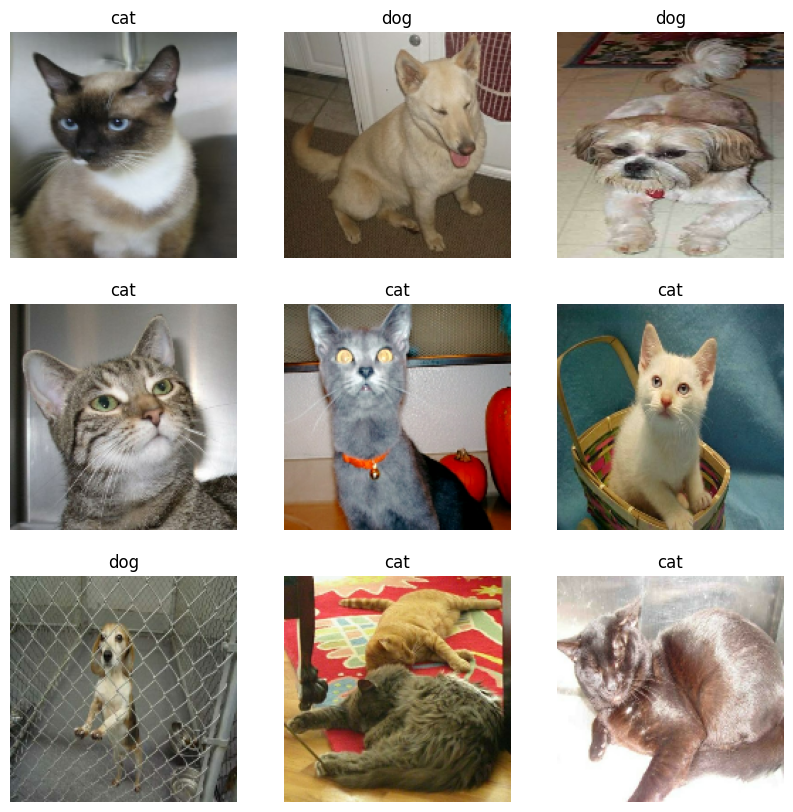

In [205]:
# Retrieve a batch of images from the test set
print(test_batches)
#image_batch, label_batch = raw_test.as_numpy_iterator().next()
image_batch, label_batch = test_batches.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)
print(image_batch.shape)
print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

image_display_test_1 = ((image_batch[0] + 1) * 127.5).astype(np.uint8) ## 显示前将图像从 [-1,1] 转回 [0,255]
print(image_batch[0], type(image_batch[0]), image_batch[0].shape)
print(image_display_test_1, type(image_display_test_1), image_display_test_1.shape)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  # plt.imshow(image_batch[i].astype("uint8"))
  image_display_test = ((image_batch[i] + 1) * 127.5).astype(np.uint8)
  plt.imshow(image_display_test)
  plt.title(get_label_name(predictions[i]))
  plt.axis("off")

In [194]:
model.save("dogs_vs_cats_3.h5")  # we can save the model and reload it at anytime in the future
new_model = tf.keras.models.load_model('dogs_vs_cats.h5')


And that's it for this section on computer vision!

##Object Detection
If you'd like to learn how you can perform object detection and recognition with tensorflow check out the guide below.

https://github.com/tensorflow/models/tree/master/research/object_detection

##Sources
1. “Convolutional Neural Network (CNN) &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/images/cnn.
2. “Transfer Learning with a Pretrained ConvNet &nbsp;: &nbsp; TensorFlow Core.” TensorFlow, www.tensorflow.org/tutorials/images/transfer_learning.
3. Chollet François. Deep Learning with Python. Manning Publications Co., 2018.

